# pyckmeans

pyckmeans is a Python package for [Consensus K-Means](https://doi.org/10.1023/A:1023949509487) and [Weighted Ensemble Consensus of Random (WECR) K-Means](https://doi.org/10.1109/TKDE.2019.2952596) clustering, especially in the context of DNA sequence data. In addition to the clustering functionality, it provides tools for working with DNA sequence data such as reading and writing of DNA alignment files, calculating genetic distances, and Principle Coordinate Analysis (PCoA) for dimensionality reduction.


## Consensus K-Means

[Consensus K-Means](https://doi.org/10.1023/A:1023949509487) is an unsupervised ensemble clustering algorithm, combining multiple K-Means clusterings, where each K-Means is trained on a subset of the data (random subset) and a subset of the the features (random subspace). The predicted cluster memberships of the single clusterings are combined to a consensus (or co-association) matrix, determining the number of times each pair of samples was clustered together over all clusterings. This matrix can be interpreted as similarity matrix and can be used to resolve the final consensus clustering by subjecting it to a last clustering step, e.g. hierarchical, or spectral clustering.

## WECR K-Means

[Weighted Ensemble Consensus of Random (WECR) K-Means](https://doi.org/10.1109/TKDE.2019.2952596) is a semi-supervised ensemble clustering algorithm. Similar to consensus K-Means, it is based on a collection of K-Means clusterings, which are each trained on a random subset of data and a random subspace of features. In addition, for each single clustering the number of clusters *k* is also randomized. This library of clusterings is subjected to weighting function that integrates user-supplied must-link and must-not-link constraints, as well as an internal cluster validation criterion. The constraints represent the semi-supervised component of WECR K-Means: the user can provide prior knowledge considering the composition of the clusters. Must-link and must-not-link constraints imply that a pair of samples (observations, data points) is expected to be found in the same or different clusters, respectively. Based on the clusterings and the calculated weights, a weighted consensus (co-association) matrix is constructed, which is subjected to Cluster-based Similariry Partitioning (CSPA; e.g. hierarchical clustering) or spectral clustering to resolve the consensus clustering.

## Documentation

See pyckmeans' [RTD Documentation](https://pyckmeans.readthedocs.io/) for details.

## Installation

pyckmeans can be installed using pip, Conda, or from source.

### pip

```bash
pip install pyckmeans
```

### Conda

```bash
conda install pyckmeans -c TankredO
```

### From Source

The installation from source requires `git` and a c++ compiler.

```bash
git clone https://github.com/TankredO/pyckmeans
cd pyckmeans
pip install .
```



## Usage

### Consensus K-Means: Clustering a Data Matrix (Single K)

Bayesian Information Criterion: 50.21824821939818
Davies-Bouldin Index: 0.2893792767901513
Silhouette Score: 0.7827738719266039
Calinski-Harabasz Index: 630.8235586596012
Cluster Membership: [0 2 1 0 2 2 1 0 2 1 0 0 2 0 2 2 1 1 1 1 0 1 2 2 2 2 1 0 2 2 1 0 1 1 0 0 0
 1 0 1 2 1 2 2 1 0 0 0 0 1]


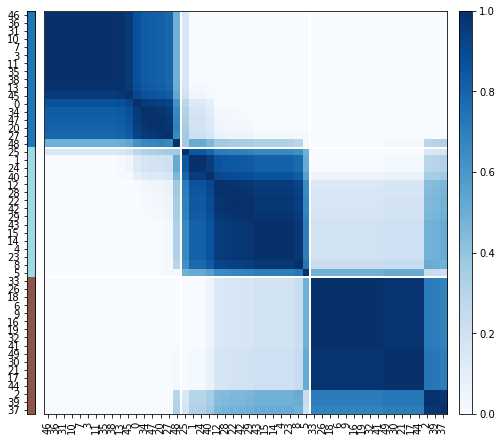

In [1]:
from pyckmeans import CKmeans

# simulate dataset
# 50 samples, 2 features, 3 true clusters
import sklearn.datasets
x, _ = sklearn.datasets.make_blobs(n_samples=50, n_features=2, centers=3, random_state=75)

# apply Consensus K-Means
# 3 clusters, 100 K-Means runs,
# draw 80% of samples and 50% of features for each single K-Means
ckm = CKmeans(k=3, n_rep=100, p_samp=0.8, p_feat=0.5)
ckm.fit(x)
ckm_res = ckm.predict(x)

# plot consensus matrix and consensus clustering
fig = ckm_res.plot(figsize=(7,7))

# consensus matrix
ckm_res.cmatrix

# clustering metrics
print('Bayesian Information Criterion:', ckm_res.bic)
print('Davies-Bouldin Index:', ckm_res.db)
print('Silhouette Score:', ckm_res.sil)
print('Calinski-Harabasz Index:', ckm_res.ch)

# consensus clusters
print('Cluster Membership:', ckm_res.cl)

### Consensus K-Means: Clustering a Data Matrix (Multi K)

Metrics:
   k       sil         bic        db          ch
0  2  0.574369  225.092100  0.646401   59.733498
1  3  0.788207  126.358519  0.302979  387.409107
2  4  0.551277  127.717843  1.384464  266.821146
3  5  0.333347  128.536692  1.733853  208.976643


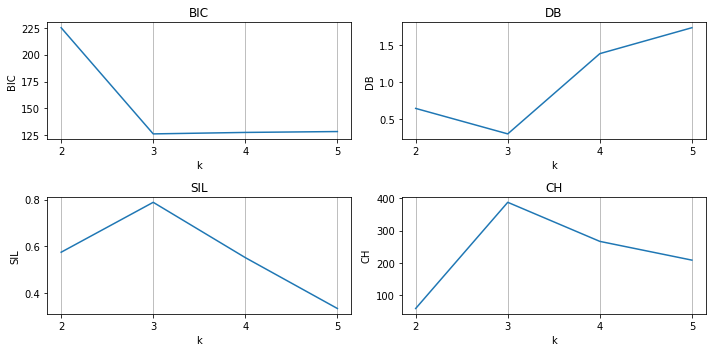

In [2]:
from pyckmeans import MultiCKMeans
import sklearn.datasets

# simulate dataset
# 50 samples, 10 features, 3 true clusters
x, _ = sklearn.datasets.make_blobs(n_samples=50, n_features=10, centers=3, random_state=44)

# apply multiple Consensus K-Means for
# k = 2, ..., 5
# 100 K-Means runs per Consensus K-Means
# draw 80% of the sample for each single K-Means
# draw 50% of the features for each single K-Means
mckm = MultiCKMeans(k=[2, 3, 4, 5], n_rep=100, p_samp=0.8, p_feat=0.5)
mckm.fit(x)
mckm_res = mckm.predict(x)

# clustering metrics
print('Metrics:')
print(mckm_res.metrics)

# plot clustering metrics against k
# BIC, DB: lower is better
# SIL, CH: higher is better
mckm_res.plot_metrics(figsize=(10,5))


# get a single CKmeansResult                  0 |1| 2  3
ckm_res_k3 = mckm_res.ckmeans_results[1] # k=[2, 3, 4, 5]
# ...
# see "Clustering a Data Matrix (Single K)"

### Clustering Sequence Data

Nucleotide alignment: <NucleotideAlignment; #samples: 108, #sites: 6752>
Eigenvalues:


,eigvals,eigvals_rel,eigvals_rel_cum,eigvals_rel_corrected,eigvals_rel_corrected_cum
0,0.115972,0.471458,0.233986,0.233986,0.233986
1,0.039585,0.160924,0.317016,0.083030,0.317016
2,0.035079,0.142604,0.391140,0.074125,0.391140
3,0.017383,0.070665,0.430295,0.039154,0.430295
4,0.009831,0.039965,0.454525,0.024230,0.454525
...,...,...,...,...,...
103,-0.001325,-0.005388,0.998575,0.001457,0.998575
104,-0.001693,-0.006881,0.999654,0.001079,0.999654
105,-0.001884,-0.007660,1.000000,0.000346,1.000000
106,-0.002255,-0.009168,1.000000,0.000000,1.000000


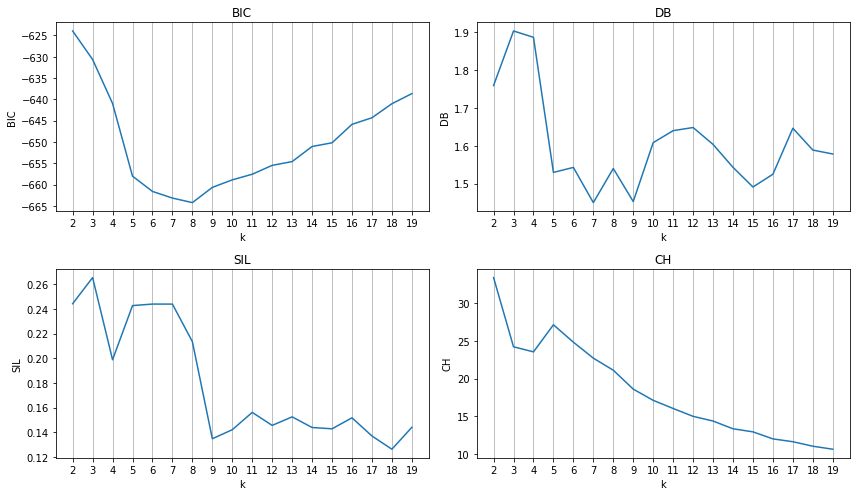

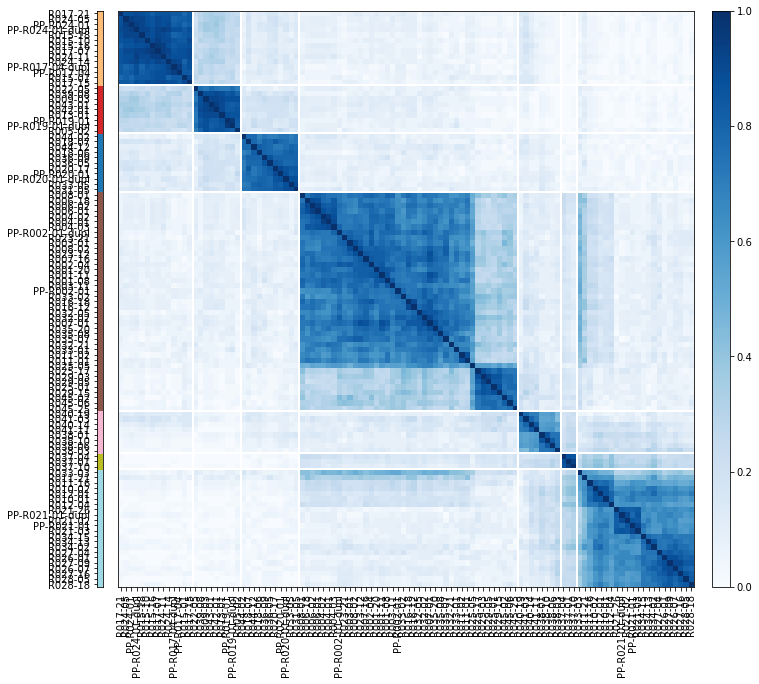

In [3]:
from pyckmeans import MultiCKMeans, NucleotideAlignment, pcoa
from IPython.display import display
# Set random seed for demonstration
import numpy
numpy.random.seed(0)

# Load nucleotide alignment
# Note: the file is available from
# "https://github.com/TankredO/pyckmeans/tree/main/docs/datasets/rhodanthemum_ct85_msl68.snps.phy"
aln = NucleotideAlignment.from_file('datasets/rhodanthemum_ct85_msl68.snps.phy')
print('Nucleotide alignment:', aln)

# Calculate Kimura 2-parameter distances
dst = aln.distance(distance_type='k2p')

# Apply PCoA, including negative Eigentvalue correction
pcoa_res = pcoa(dst, correction='lingoes')
# display Eigenvalues
print('Eigenvalues:')
display(pcoa_res.values)

# Get Eigenvectors until the cumulative corrected Eigenvalues are >= 0.8
vectors = pcoa_res.get_vectors(
    filter_by='eigvals_rel_corrected_cum',
    filter_th=0.8,
    out_format='pandas'
)

# Apply Multi-K Consensus K-Means
mckm = MultiCKMeans(
    k=range(2, 20),
    n_rep=50,
    p_samp=0.8,
    p_feat=0.8
)
mckm.fit(vectors)
mckm_res = mckm.predict(vectors)
mckm_res.plot_metrics(figsize=(12, 7))

# Select a 'good' K
# At k values around 7, BIC, DB, and SIL have a (local) optimum
ckm_res_k7 = mckm_res.ckmeans_results[5]
fig = ckm_res_k7.plot(figsize=(10,10))

### Weighted Ensemble Consensus of Random K-Means (WECR)

cluster_membership:
PP-R002-01         0
PP-R002-01-dupl    0
PP-R017-04         4
PP-R017-04-dupl    4
PP-R019-01         5
                  ..
R044-02            3
R044-12            3
R045-02            0
R045-06            0
R045-25            0
Length: 108, dtype: int32


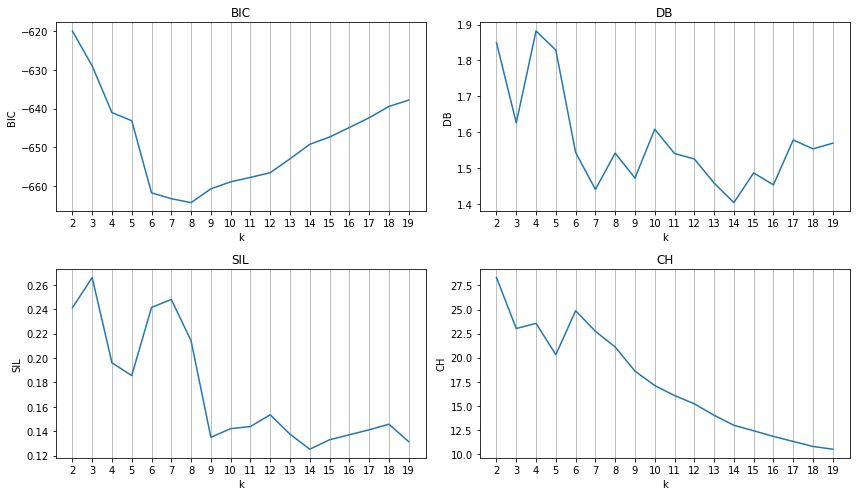

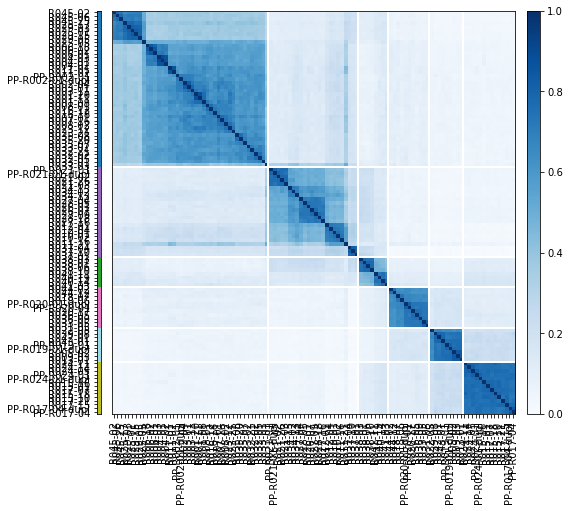

In [4]:
from pyckmeans import WECR, NucleotideAlignment, pcoa

# Load nucleotide alignment
aln = NucleotideAlignment.from_file('datasets/rhodanthemum_ct85_msl68.snps.phy')

# Calculate Kimura 2-parameter distances
dst = aln.distance(distance_type='k2p')

# Apply PCoA, including negative Eigentvalue correction
pcoa_res = pcoa(dst, correction='lingoes')

# Get Eigenvectors until the cumulative corrected Eigenvalues are >= 0.8
vectors = pcoa_res.get_vectors(
    filter_by='eigvals_rel_corrected_cum',
    filter_th=0.8,
    out_format='pandas'
)

# Apply WECR K-Means
wecr = WECR(
    k=range(2, 20),
    n_rep=1000,
    p_samp=0.6,
    p_feat=0.6,
)
wecr.fit(vectors)
wecr_res = wecr.predict(vectors)

# Plot clustering metrics for each k
wecr_res.plot_metrics(figsize=(12, 7))

# Select a 'good' K (e.g., 6, 7, 8) for the consensus clustering
wecr_res.plot(k=6)

cluster_membership = wecr_res.get_cl(k=6, with_names=True)
print('cluster_membership:')
print(cluster_membership)